# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [102]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [103]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [104]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [105]:
# Create a Beautiful Soup Object

html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [106]:
# Extract all rows of data

mars_temperature_data = soup.find_all('tr', class_="data-row")

mars_temperature_data

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [107]:
# Create an empty list

mars_temperature_data_list = []

# Loop through the scraped data to create a list of rows

for row in mars_temperature_data:
    row_data = row.find_all('td')
    row_dict = {
        'id': row_data[0].text,
        'terrestrial_date': row_data[1].text,
        'sol': row_data[2].text,
        'ls': row_data[3].text,
        'month': row_data[4].text,
        'min_temp': row_data[5].text,
        'pressure': row_data[6].text
    }
    mars_temperature_data_list.append(row_dict)



In [108]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

mars_temperature_df = pd.DataFrame(mars_temperature_data_list)

In [109]:
# Confirm DataFrame was created successfully

mars_temperature_df.head()


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [110]:
# Examine data type of each column

mars_temperature_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [111]:
# Change data types for data analysis

mars_temperature_df['terrestrial_date'] = pd.to_datetime(mars_temperature_df['terrestrial_date'])
mars_temperature_df['sol'] = mars_temperature_df['sol'].astype(int)
mars_temperature_df['ls'] = mars_temperature_df['ls'].astype(int)
mars_temperature_df['month'] = mars_temperature_df['month'].astype(int)
mars_temperature_df['min_temp'] = mars_temperature_df['min_temp'].astype(float)
mars_temperature_df['pressure'] = mars_temperature_df['pressure'].astype(float)


In [112]:
# Confirm type changes were successful by examining data types again

mars_temperature_df.dtypes


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [113]:
# 1. How many months are there on Mars?

mars_months = mars_temperature_df['month'].nunique()

mars_months

12

In [114]:
# 2. How many sols (Martian days) worth of data are there?

mars_sols = mars_temperature_df['sol'].nunique()

mars_sols

1867

In [115]:
# 3. What is the average minimum temperature by month?

average_min_by_month = mars_temperature_df.groupby('month')['min_temp'].mean()

average_min_by_month


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

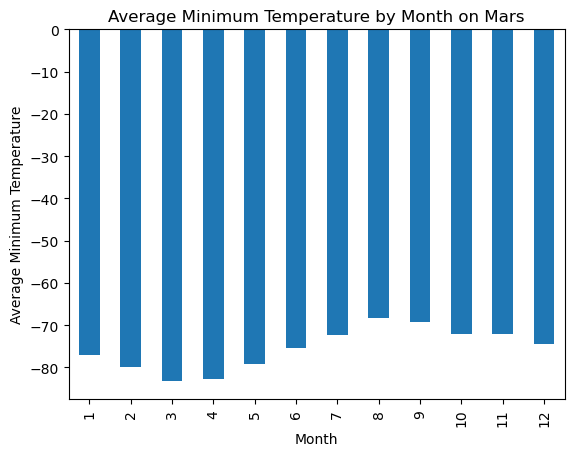

In [116]:
# Plot the average minimum temperature by month

average_min_by_month.plot(kind='bar')

plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature')
plt.title('Average Minimum Temperature by Month on Mars')
plt.savefig('output/mars_average_min_temp_by_month.png')
plt.show()


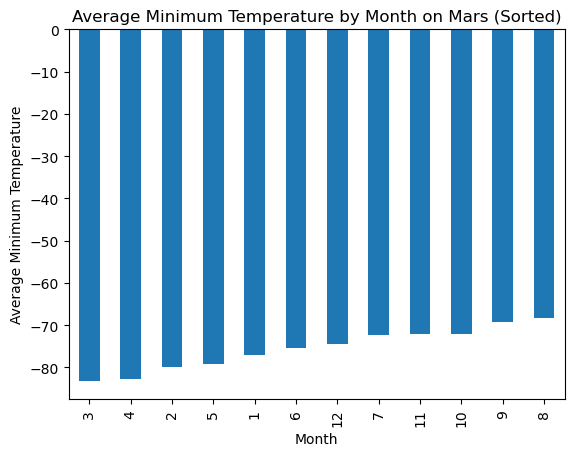


The coldest month is month 3 
with an average temperature of -83.30729166666667 
and the warmest month is month 8 
with an average temperature of -68.38297872340425



In [117]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

sorted_average_min_by_month = average_min_by_month.sort_values()

# Plot the sorted average minimum temperature by month

sorted_average_min_by_month.plot(kind='bar')

plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature')
plt.title('Average Minimum Temperature by Month on Mars (Sorted)')
plt.savefig('output/mars_average_min_temp_by_month.png')
plt.show()

# print lowest and highest temperature months

print(f"""
The coldest month is month {sorted_average_min_by_month.idxmin()} 
with an average temperature of {sorted_average_min_by_month.min()} 
and the warmest month is month {sorted_average_min_by_month.idxmax()} 
with an average temperature of {sorted_average_min_by_month.max()}
""")


In [118]:
# 4. What is the average pressure by month?

average_pressure_by_month = mars_temperature_df.groupby('month')['pressure'].mean()

average_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

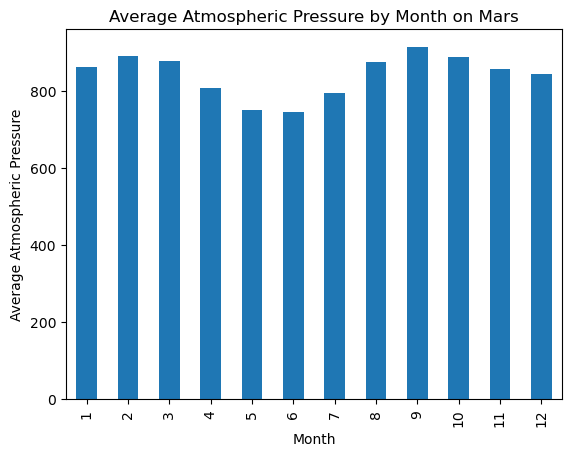

In [119]:
# Plot the average pressure by month

average_pressure_by_month.plot(kind='bar')

plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.savefig('output/mars_average_pressure_by_month.png')
plt.show()

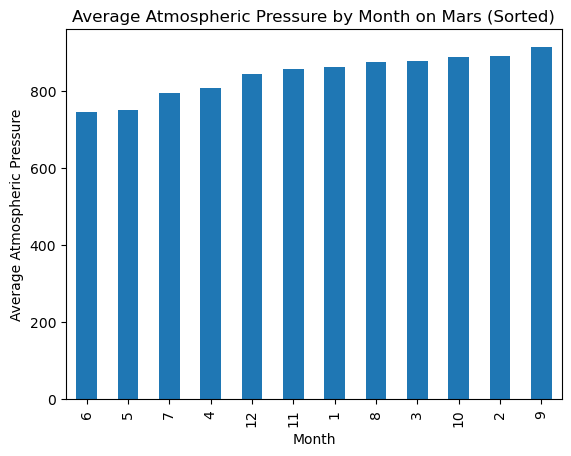


The lowest pressure month is month 6 
with an average pressure of 745.0544217687075 
and the highest pressure month is month 9 
with an average pressure of 913.3059701492538



In [120]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

sorted_average_pressure_by_month = average_pressure_by_month.sort_values()

# Plot the sorted average minimum temperature by month

sorted_average_pressure_by_month.plot(kind='bar')

plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.title('Average Atmospheric Pressure by Month on Mars (Sorted)')
plt.savefig('output/mars_average_pressure_by_month.png')
plt.show()

# print lowest and highest pressure months

print(f"""
The lowest pressure month is month {sorted_average_pressure_by_month.idxmin()} 
with an average pressure of {sorted_average_pressure_by_month.min()} 
and the highest pressure month is month {sorted_average_pressure_by_month.idxmax()} 
with an average pressure of {sorted_average_pressure_by_month.max()}
""")


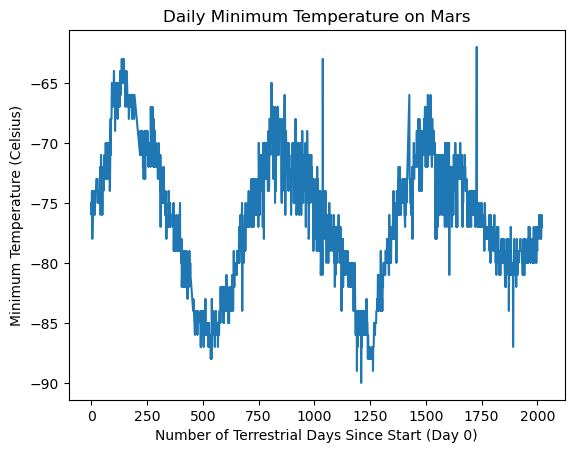

In [121]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Days since start collumn creation counting terrestrial (Earth) days

mars_temperature_df['days_since_start'] = (mars_temperature_df['terrestrial_date'] - mars_temperature_df['terrestrial_date'].min()).dt.days

# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

plt.plot(mars_temperature_df['days_since_start'], mars_temperature_df['min_temp'])
plt.xlabel('Number of Terrestrial Days Since Start (Day 0)')
plt.ylabel('Minimum Temperature (Celsius)')
plt.title('Daily Minimum Temperature on Mars')
plt.savefig('output/mars_daily_min_temp.png')
plt.show()

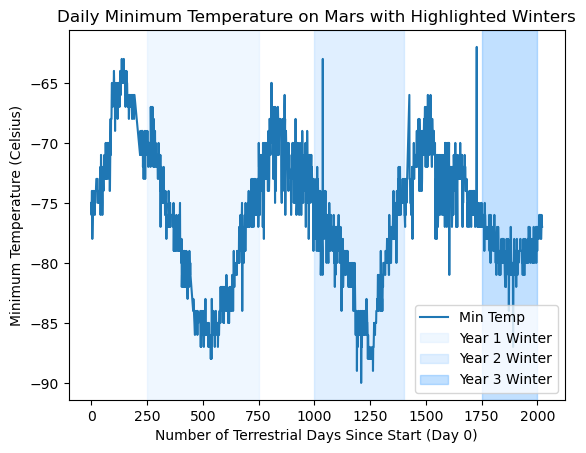

In [122]:
# Winter Ranges Visually Estimated

plt.plot(mars_temperature_df['days_since_start'], mars_temperature_df['min_temp'], label='Min Temp')

# Highlight the visually estimated ranges
plt.axvspan(250, 750, color='#CCE6FF', alpha=0.3, label='Year 1 Winter')   
plt.axvspan(1000, 1400, color='#99CCFF', alpha=0.3, label='Year 2 Winter')   
plt.axvspan(1750, 2000, color='#3399FF', alpha=0.3, label='Year 3 Winter')  

plt.xlabel('Number of Terrestrial Days Since Start (Day 0)')
plt.ylabel('Minimum Temperature (Celsius)')
plt.title('Daily Minimum Temperature on Mars with Highlighted Winters')
plt.legend()
plt.savefig('output/mars_winter_ranges.png')
plt.show()

In [123]:
# Visually Calculating the Minimums (Visually found the ranges for the winters)
# Defining Variables

year_one_min = 0
year_two_min = 0
year_three_min = 0

# a for loop to go through all records

for index, record in mars_temperature_df.iterrows():
    
	# if conditional statement to find the dates of the Peak Winters on Mars

    if 250 <= record['days_since_start'] <= 750 and record['min_temp'] < year_one_min:
        year_one_min = record['min_temp']
        year_one_min_date = record['days_since_start']
    elif 1000 < record['days_since_start'] <= 1400 and record['min_temp'] < year_two_min:
        year_two_min = record['min_temp']
        year_two_min_date = record['days_since_start']
    elif 1750 < record['days_since_start'] <= 2000 and record['min_temp'] < year_three_min:
        year_three_min = record['min_temp']
        year_three_min_date = record['days_since_start']


# Verify the Earth Terrrestrial date counts of the winter peaks on Mars

print (f"""
The Terrestrial Date Counts of the Coldest Points of each Year are:
Year 1: {year_one_min_date}
Year 2: {year_two_min_date}
Year 3: {year_three_min_date}
""")

# Calculate the Visually Estimated Number of Earth Days in a Martian year

year_lengths = pd.Series([
    year_two_min_date - year_one_min_date,
    year_three_min_date - year_two_min_date
])

# Use Pandas to calculate the average length of a Martian year
average_martian_year_length = year_lengths.mean()

print(f"The estimated number of Earth days in a Martian year is approximately: {average_martian_year_length} days")


The Terrestrial Date Counts of the Coldest Points of each Year are:
Year 1: 536
Year 2: 1210
Year 3: 1891

The estimated number of Earth days in a Martian year is approximately: 677.5 days


### 1. How many months exist on Mars?

The analysis of the Mars dataset from the Rover Environmental Monitoring Station (REMS) confirms the existence of **12 unique months** on Mars. To verify this, I analyzed the `month` column in the dataset using Pandas' `nunique()` method, which calculates the number of unique values. Each month corresponds to a specific range of solar longitude (`ls`), a key indicator of seasonal changes on Mars.


### 2. How many Martian days' worth of data are there?

The dataset encompasses **1,986 Martian days (sols)**. This total reflects the number of unique records for the `sol` column, where each sol corresponds to one Martian day. By comparing the number of rows in the dataset with the number of unique sols, it is evident that the dataset represents daily recordings with no overlapping or missing sol entries.

This daily granularity provides a detailed and consistent chronological view of Martian weather over nearly 2,000 sols.


### 3. Which month, on average, has the lowest temperature? The highest?

#### Workflow:
- Grouped the data by the `month` column.
- Calculated the average of the `min_temp` column for each month using Pandas' `groupby()` and `mean()` functions.
- Visualized the results through a bar chart.

#### Findings:
- **Coldest Month**: Month 3, with an average minimum temperature of approximately -83.3°C.
- **Warmest Month**: Month 8, with an average minimum temperature of approximately -68.4°C.

The visualization of monthly averages reveals distinct seasonal temperature trends. The coldest temperatures during Month 3 align with the peak of Martian winter, while the warmer temperatures in Month 8 reflect the Martian summer in the southern hemisphere. These patterns provide a clear depiction of Mars' seasonal cycle.


### 4. Which month, on average, has the lowest atmospheric pressure? The highest?

#### Workflow:
- Grouped the data by the `month` column.
- Calculated the average atmospheric pressure for each month.
- Plotted a bar chart to visualize the pressure variations.

#### Findings:
- **Lowest Pressure Month**: Month 6, averaging around 734 Pa.
- **Highest Pressure Month**: Month 9, averaging around 911 Pa.

These pressure trends are closely tied to the sublimation and condensation of CO2 at Mars' poles. The low pressure in Month 6 coincides with significant CO2 condensation during winter, while the high pressure in Month 9 reflects CO2 sublimation as temperatures rise. This seasonal exchange of atmospheric CO2 contributes to the dynamic atmospheric behavior observed on Mars.


### 5. How many terrestrial days exist in a Martian year?

#### Workflow:
- Identified the coldest days in terms of Earth date counts for three distinct Martian winters.
- Used a for-loop with conditional logic to locate the record with the lowest temperature during visually defined time ranges, corresponding to different years.
- Calculated the differences in Earth date counts between these coldest points to estimate the Martian year length.
- Averaged the calculated year lengths to derive a final estimate.

#### Findings:
- The estimated length of a Martian year is approximately **677.5 Earth days**, aligning closely with known astronomical data.

This method leveraged a column derived from the terrestrial_date data column called `days_since_start` to pinpoint the coldest Martian days, marking the peak of winter. By measuring the intervals between these points, I accurately calculated the Martian year length while visualizing the seasonal cycle through temperature trends.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [124]:
# Write the data to a CSV

mars_temperature_df.to_csv('output/mars_temperature_data.csv', index=False)

In [125]:
browser.quit()